In [1]:
%cd ..

d:\Repositories\other\nbody


In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from barnes_hut.BHTree import Tracker, Body

plt.style.use('dark_background')
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.rcParams['animation.embed_limit'] = 2**128
plt.ioff()

In [3]:
def animate_bodies(_bodies, _size, _dt=1000, _N=100, F=200, I=40):
    _m = list(map(lambda x: x.get_mass(), _bodies))

    _T = Tracker(_bodies, _size, dt=_dt)

    _fig = plt.figure()
    _axes = plt.axes(xlim=(-_size, _size), ylim=(-_size, _size))
    _data = _T.get_all()
    _pic = _axes.scatter(x=_data.real, y=_data.imag, c=_m, s=20)
    plt.axis('off')
    plt.show()

    def _init():
        return _pic,

    def _animate(i):
        _T.update(N=_N)
        _pic.set_offsets(_T.get_all_pairs())
        return _pic,

    return animation.FuncAnimation(_fig, _animate, init_func=_init, frames=F, interval=I, blit=True)

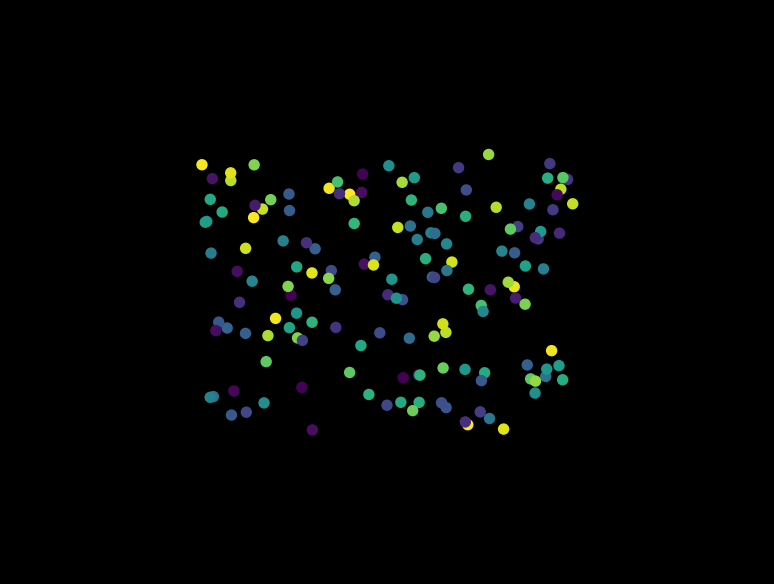

MovieWriter ffmpeg unavailable; using Pillow instead.


In [9]:
SIZE = 2.5e12
MAX_V = 5e4
MAX_M = 1e26
rng = np.random.default_rng(122807528840384100682348137672332424406)

def rnd_c(LIM):
    return LIM * (rng.random() - 0.5 + 1j * rng.random() - 0.5j)

b = [Body(rnd_c(SIZE), rnd_c(MAX_V), rng.random() * MAX_M) for i in range(150)]

anim = animate_bodies(b, SIZE, _N=100, _dt=10000, F=200, I=40)
anim.save("output/random150.gif")